In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/Abdullah Shahid/Downloads/housing_price_dataset.csv',encoding='latin1')

In [3]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.keys()

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [5]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [7]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [8]:
def convert_neighborhood(neighborhood):
    mapping = {
        'Rural': 1,
        'Urban': 2,
        'Suburb': 3
    }
    return mapping.get(neighborhood, 0) 

df['Neighborhood'] = df['Neighborhood'].apply(convert_neighborhood)

In [9]:
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,-0.001054,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004723,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.004745,0.003748,0.028418
Neighborhood,-0.001054,-0.004723,0.004745,1.000000,0.003197,-0.004643
YearBuilt,0.000482,0.003147,0.003748,0.003197,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,-0.004643,-0.002288,1.000000


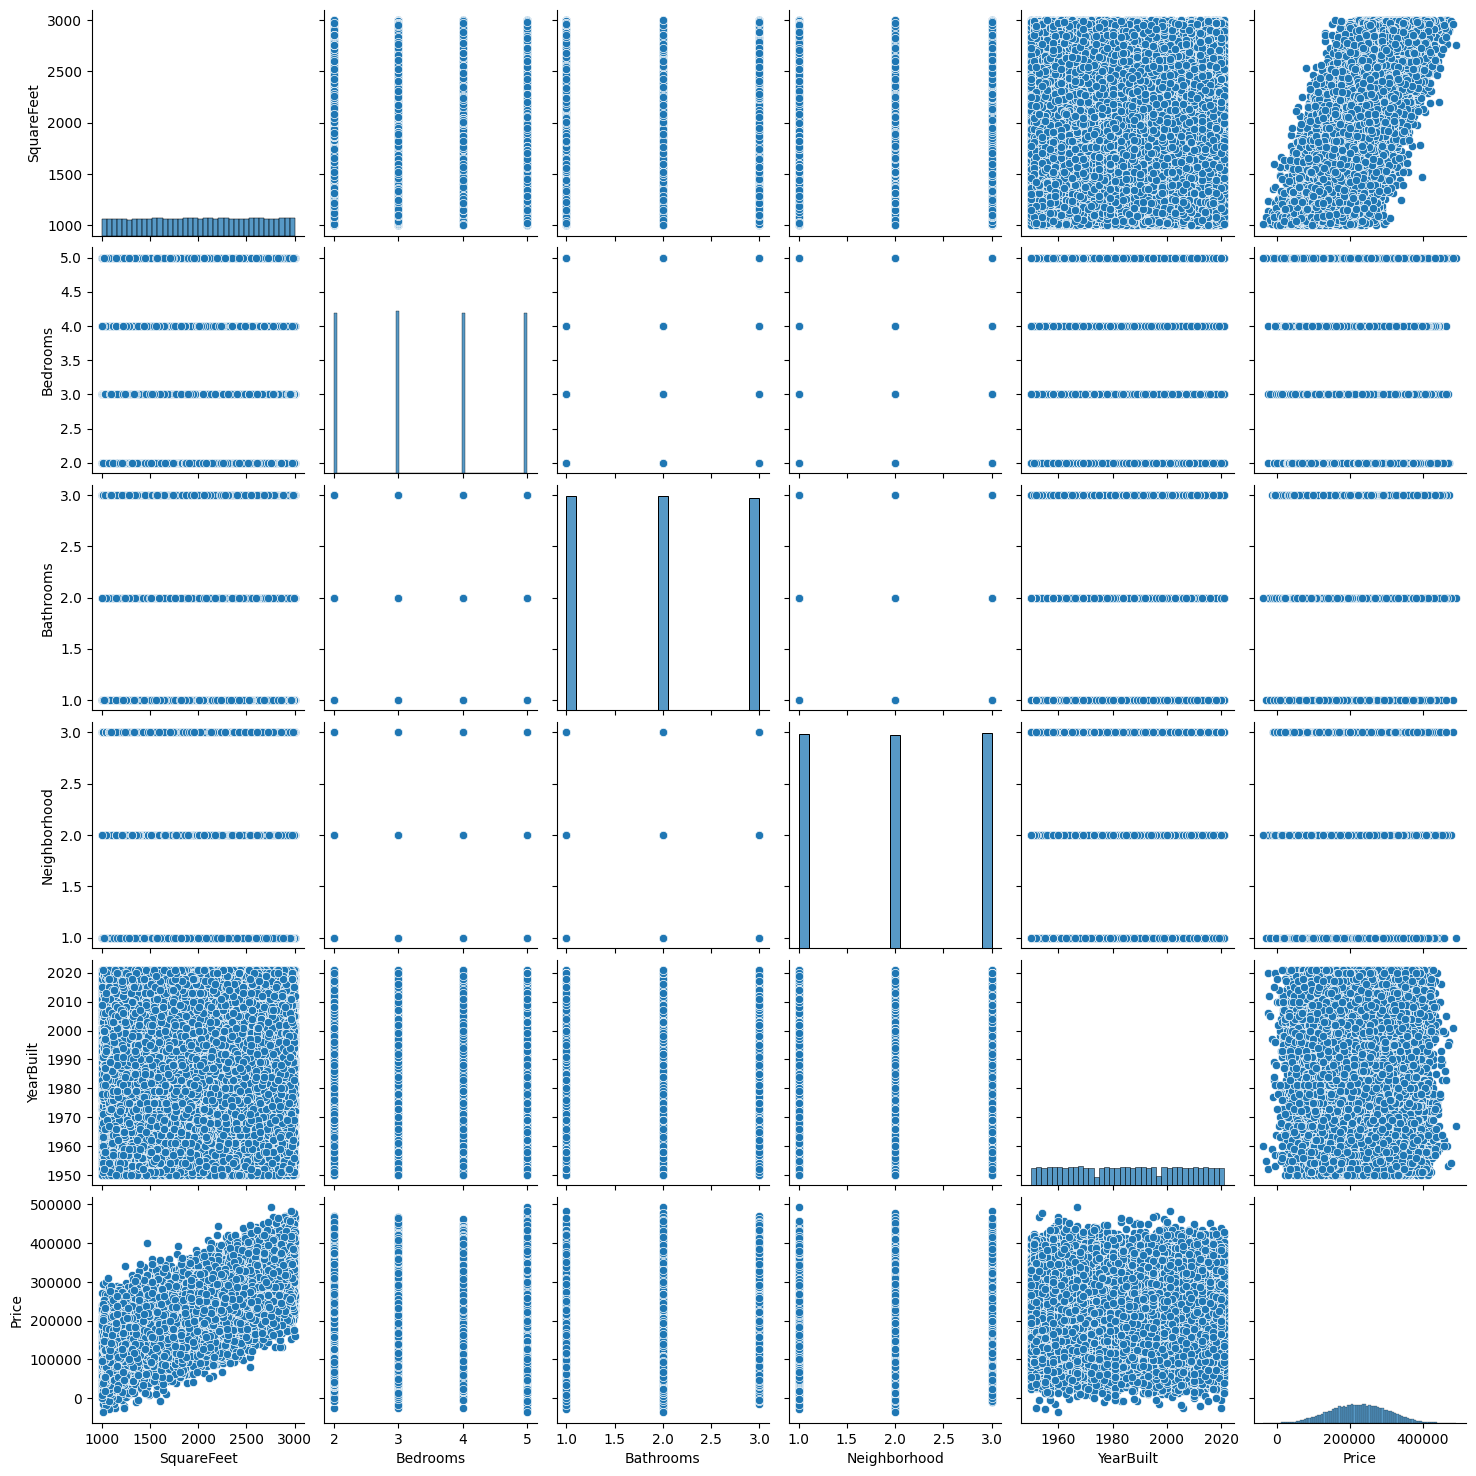

In [10]:
sns.pairplot(df)

Text(0, 0.5, 'Price')

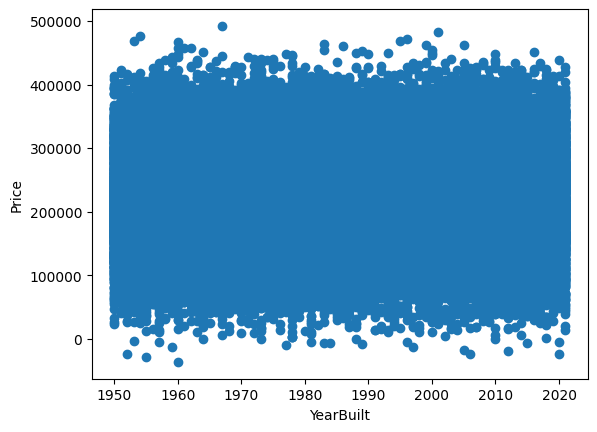

In [11]:
plt.scatter(df['YearBuilt'],df['Price'])
plt.xlabel('YearBuilt')
plt.ylabel('Price')

<Axes: xlabel='SquareFeet', ylabel='Price'>

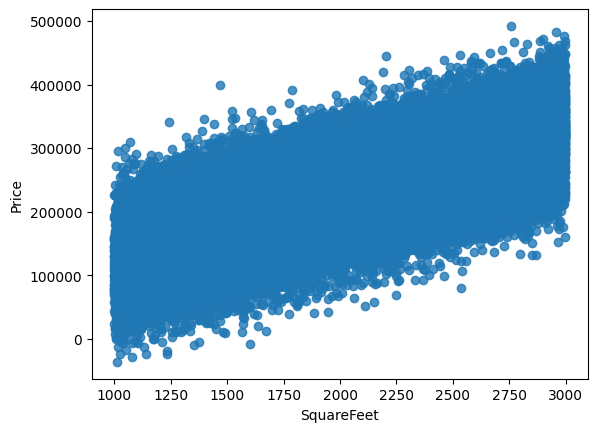

In [12]:
sns.regplot(x='SquareFeet',y='Price',data=df)

In [13]:
### Dividing data set in to test and train


In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
y.head()

0    215355.283618
1    195014.221626
2    306891.012076
3    206786.787153
4    272436.239065
Name: Price, dtype: float64

In [16]:
### train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=35)

In [18]:
X_test

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
45663,2591,4,1,1,1950
46963,1773,3,3,1,1952
3742,2177,5,1,3,1962
38082,2883,2,1,2,2017
22570,1494,3,3,3,2011
...,...,...,...,...,...
39541,2708,3,1,1,1973
38078,2825,3,2,1,2008
27206,1172,2,3,2,1986
1232,1698,2,3,1,2010


In [19]:
y_test

45663    350208.097084
46963    272178.546690
3742     234625.579937
38082    278588.875964
22570    237828.209570
             ...      
39541    212188.171544
38078    353602.725785
27206    125058.543147
1232     276522.321705
46585     50966.561167
Name: Price, Length: 15000, dtype: float64

In [20]:
X_train

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
23363,1469,3,1,3,1963
12337,1732,3,1,2,1967
36262,1087,4,1,3,1972
572,2002,3,1,3,2014
9419,2004,3,1,2,2006
...,...,...,...,...,...
15808,2091,2,2,3,1961
19391,2272,4,2,2,2012
48161,1504,2,1,3,2000
41911,2754,2,2,1,2019


In [21]:
y_train

23363    178732.242824
12337    143200.743284
36262    131435.398124
572      259033.569609
9419     223121.173187
             ...      
15808    190090.344107
19391    309020.852203
48161    132886.108270
41911    270094.146408
5833     132091.573291
Name: Price, Length: 35000, dtype: float64

In [22]:
print(type(X_train))
print(X_train.shape)


<class 'pandas.core.frame.DataFrame'>
(35000, 5)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
X_train_scaled


array([[-0.9311444 , -0.44417605, -1.21798622,  1.22192439, -1.0764022 ],
       [-0.47350197, -0.44417605, -1.21798622, -0.00304492, -0.88379666],
       [-1.59585699,  0.45195963, -1.21798622,  1.22192439, -0.64303973],
       ...,
       [-0.87024142, -1.34031173, -1.21798622,  1.22192439,  0.70519904],
       [ 1.30486521, -1.34031173,  0.00735203, -1.22801424,  1.62007536],
       [-0.83543971, -0.44417605, -1.21798622,  1.22192439, -0.20967727]])

In [63]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))


In [26]:
### Model training


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression=LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression()

In [30]:
### Printing Coefficient
print(regression.coef_)

[  99.2529941  5046.10275031 3074.2937127  -238.77421966   -6.80510398]


In [31]:
print(regression.intercept_)

15806.985045995592


In [32]:
### to find on which parameters model is trained

In [33]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [34]:
### Prediction with test data

In [35]:
predictions=regression.predict(X_test)

In [36]:
predictions

array([282721.47048848, 202621.39578316, 246117.62399499, ...,
       137454.09582475, 189736.62244464, 149529.0204872 ])

In [37]:
### Prediction checking


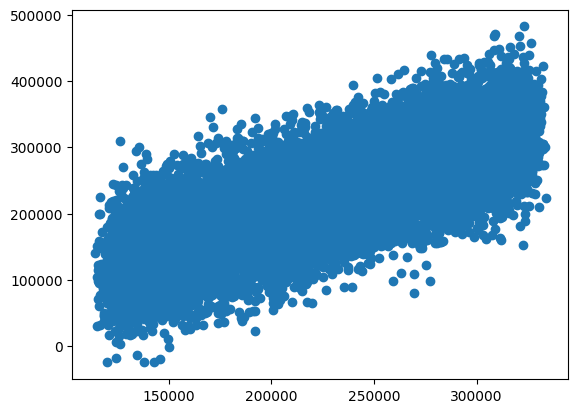

In [38]:
plt.scatter(predictions,y_test)

In [39]:
resudals=y_test-predictions

In [40]:
resudals

45663    67486.626595
46963    69557.150907
3742    -11492.044058
38082   -22327.547114
22570    63777.448714
             ...     
39541   -76943.279112
38078    50022.559746
27206   -12395.552678
1232     86785.699260
46585   -98562.459321
Name: Price, Length: 15000, dtype: float64

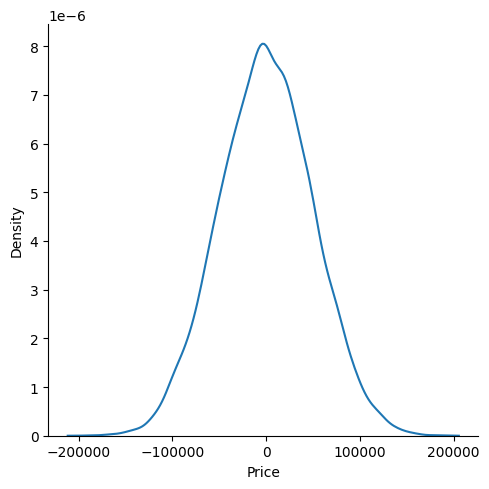

In [41]:
### Plot the resudals

sns.displot(resudals,kind='kde')

In [42]:
### Here we get a normalized Predictions and resudals

In [43]:
### scatter plot with respect to resudals and predictions

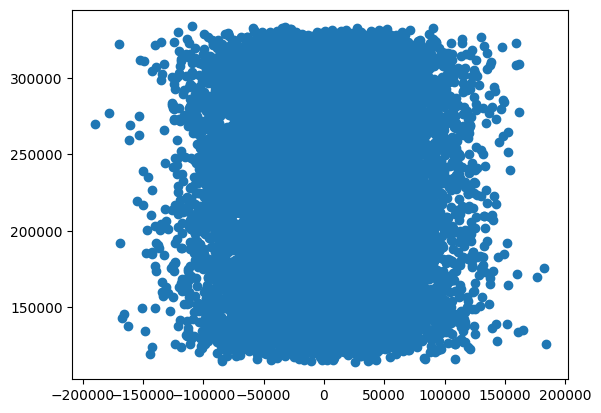

In [44]:
plt.scatter(resudals, predictions)

In [45]:
## Perfomance mtrices

In [46]:

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,predictions))

print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

39772.21039711114
2473985233.657249
49739.17202424312


In [47]:
### R squared Matrices

In [48]:
from sklearn.metrics import r2_score
scorer2=r2_score(y_test,predictions)
scorer2

0.57440252120417

In [49]:
### Adjusted R Square

In [50]:
Adj_r2 = 1-(1-scorer2)*(len(y_test-1))/(len(y_test)-X_test.shape[1]-1)

In [51]:
Adj_r2

0.574232214089806

In [52]:
### New data prediction

In [53]:
df.iloc[0].values.reshape(1, -1)


array([[2.12600000e+03, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.96900000e+03, 2.15355284e+05]])

In [54]:
df_without_price = df.drop(columns=['Price']) 
scaler.transform(df_without_price.iloc[2].values.reshape(1, -1))  


d:\Data Science\Projects\BostonHousePricing\venv2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.25077105, -1.34031173, -1.21798622,  1.22192439, -0.7393425 ]])

In [55]:
regression.predict(df_without_price.iloc[2].values.reshape(1, -1))

d:\Data Science\Projects\BostonHousePricing\venv2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([199461.67578303])

In [56]:
### Pickling The Model

In [57]:
import pickle

In [58]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [59]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [60]:
pickled_model.predict(df_without_price.iloc[2].values.reshape(1, -1))

d:\Data Science\Projects\BostonHousePricing\venv2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([199461.67578303])